<a href="https://colab.research.google.com/github/s0ye0nyang/people-space/blob/master/shoes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pip

# !pip-compile requirements.in
# !pip install -r requirements.in
!pip install -Uqq fastbook
# !pip install -e ".[dev]"
import fastbook
import pandas as pd
import numpy as np
fastbook.setup_book()
# torch.cuda.is_available()


In [ ]:
from fastbook import *
# from fastai.vision.widgets import *
from fastai.vision import *
from fastai.vision.widgets import *
from pandas import DataFrame
from PIL import Image, ImageOps


In [ ]:
!pip list -v 

Package                       Version         Location                               Installer
----------------------------- --------------- -------------------------------------- ---------
absl-py                       0.10.0          /usr/local/lib/python3.6/dist-packages pip      
alabaster                     0.7.12          /usr/local/lib/python3.6/dist-packages pip      
albumentations                0.1.12          /usr/local/lib/python3.6/dist-packages pip      
altair                        4.1.0           /usr/local/lib/python3.6/dist-packages pip      
anyio                         2.0.2           /usr/local/lib/python3.6/dist-packages pip      
argon2-cffi                   20.1.0          /usr/local/lib/python3.6/dist-packages pip      
asgiref                       3.3.1           /usr/local/lib/python3.6/dist-packages pip      
astor                         0.8.1           /usr/local/lib/python3.6/dist-packages pip      
astropy                       4.1             /usr

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# key = os.environ.get('AZURE_SEARCH_KEY', '2534e2ad7fb24dc4be8e38d7b3763a24')
# search_images_bing

# results = search_images_bing(key, 'shoes')
# ims = results.attrgot('content_url')
# len(ims)

# bear_types = 'nike','adidas','reebok'
# path = Path('bears')
# if not path.exists():
#     path.mkdir()
#     for o in bear_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images_bing(key, f'{o} bear')
#         download_images(dest, urls=results.attrgot('contentUrl'))

# fns = get_image_files(path)


In [ ]:
# new_img =[]
# # creating an og_image object
# i=0
# for c in classes:
#     n = get_image_files(Path(root+'/'+c))
#     for name in n:
#       _image = Image.open(name)    
#       # print(str(name).split('/')[-1])
#       # applying grayscale method
#       gray_image = ImageOps.grayscale(_image)
#       gray_image.save(gpath[i]+'/'+str(name).split('/')[-1])
#     i+=1

In [ ]:
root = '/content/gdrive/MyDrive/Data/dataset'
classes = ['nike','adidas','reebok']
path = [root+'/'+c for c in classes]
# gpath = [root+'/'+c+'-g' for c in classes]


In [ ]:
df = DataFrame([],columns=['name','label'])
for i in range(len(classes)):
  newdf= DataFrame({
      'name':get_image_files(path[i]),
      'label':classes[i]
  })
  df = df.append(newdf)

display(df)

,name,label
0,/content/gdrive/MyDrive/Data/dataset/nike/0a14c686-eawzstfumaezit8.jpg,nike
1,/content/gdrive/MyDrive/Data/dataset/nike/123992.jpg,nike
2,/content/gdrive/MyDrive/Data/dataset/nike/12959912_13502989_600.jpg,nike
3,/content/gdrive/MyDrive/Data/dataset/nike/12959137_13486346_600.jpg,nike
4,/content/gdrive/MyDrive/Data/dataset/nike/13157995_27458924_600.jpg,nike
...,...,...
933,/content/gdrive/MyDrive/Data/dataset/reebok/unnamed (7).jpg,reebok
934,/content/gdrive/MyDrive/Data/dataset/reebok/unnamed (8).jpg,reebok
935,/content/gdrive/MyDrive/Data/dataset/reebok/unnamed (9).jpg,reebok
936,/content/gdrive/MyDrive/Data/dataset/reebok/WOMEN_RUNNING_SHOES_EG9015_1.jpg,reebok


In [ ]:
np.random.seed(2)

In [ ]:
tfms_tfms = aug_transforms(do_flip = False, flip_vert = False, mult=1.2,max_rotate=10,max_zoom=0.1,
                           pad_mode=PadMode.Border, p_lighting = 1)

In [ ]:
data = ImageDataLoaders.from_df(df,'/',item_tfms=Resize(128), batch_tfms=tfms_tfms, bs = 30, num_workers = 1)

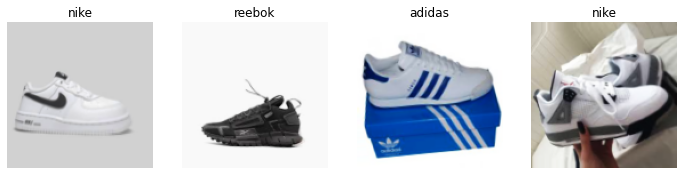

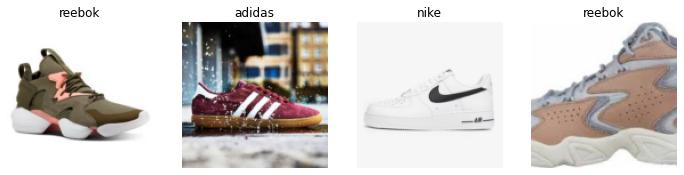

In [ ]:
data.train.show_batch(max_n=4, nrows=1)
data.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = cnn_learner(data, resnet34, metrics=error_rate)
# learn.lr_find()

In [ ]:
learn.fine_tune(4)
learn.show_results()

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: ignored

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
# interp.most_confused(min_val=2)
interp.plot_top_losses(9, figsize=(15,11))
interp.print_classification_report()


In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
Path('/').ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner('/export.pkl')

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/Data/dataset/reebok/unnamed (7).jpg')

In [ ]:
btn_upload = widgets.FileUpload()
# btn_upload = SimpleNamespace(data = ['/content/gdrive/MyDrive/Data/dataset/reebok/unnamed (7).jpg'])

In [ ]:
btn_run = widgets.Button(description='Classify')

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
lbl_pred = widgets.Label()
out_pl = widgets.Output()

In [ ]:
#hide_output
VBox([widgets.Label('Select your shoes!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 